In [1]:
import scqubits
import numpy as np
from scipy.optimize import minimize
from CoupledQuantumSystems.systems import *


In [2]:
EJ = 4
EC = EJ/2.7
EL = EJ/45

qubit_level = 20


def get_shift_accurate(ele,omega_i, omega_j, omega_r):
    return abs(ele)**2 / (omega_j-omega_i-omega_r) - abs(ele)**2 / (omega_i-omega_j-omega_r)


qbt = scqubits.Fluxonium(EJ=EJ,EC=EC,EL=EL,flux=0,cutoff=110,truncated_dim=qubit_level)
evals = qbt.eigenvals(qubit_level)
elements = qbt.matrixelement_table('n_operator',evals_count = qubit_level)

def shift_diff(x):
    Er = x[0]
    shifts_from_zero = [get_shift_accurate(elements[0,ql2],evals[ql2],evals[0],Er) for ql2 in range(qubit_level)] 
    shift_from_zero = sum(shifts_from_zero)
    # shifts_from_one = [get_shift_accurate(elements[1,ql2],evals[ql2],evals[1],Er) for ql2 in range(qubit_level)] 
    # shift_from_one = sum(shifts_from_one)
    shifts_from_two = [get_shift_accurate(elements[2,ql2],evals[ql2],evals[2],Er) for ql2 in range(qubit_level)] 
    shift_from_two = sum(shifts_from_two)
    return abs(shift_from_zero-shift_from_two)

initial_guess = [10.38695526]

# Call the optimizer
result = minimize(shift_diff, initial_guess, method='Nelder-Mead')

print("Result:", result)
print("Optimal solution:", result.x)
print("Objective value:", result.fun)


Result:        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 3.4078469070275563e-07
             x: [ 1.039e+01]
           nit: 14
          nfev: 28
 final_simplex: (array([[ 1.039e+01],
                       [ 1.039e+01]]), array([ 3.408e-07,  3.978e-07]))
Optimal solution: [10.38695526]
Objective value: 3.4078469070275563e-07


In [3]:
Er = result.x[0]

g = 0.2



max_ol = 80
max_ql = 30
system = FluxoniumOscillatorSystem(
    EJ = EJ,
    EC = EC,
    EL = EL,
    Er = Er,
    g_strength = g,
    qubit_level = max_ql,
    osc_level = max_ol,
    # kappa = 0.004,
    products_to_keep=[[ql, ol] for ql in range(max_ql) for ol in range(max_ol) ],
    computaional_states = '1,2'
    )


energies=  system.hilbertspace.eigenvals(max_ql * max_ol)
def dressed_ener(ql,ol):
    return energies[system.product_to_dressed[(ql,ol)]]
def print_stats():
    print(f"\nqubit 12 transition and differential stark at different oscillator level")
    print(f"qbt freq at osc {0}:\t{(dressed_ener(2,0)-dressed_ener(1,0))}")
    ground_freq = dressed_ener(2,0)-dressed_ener(1,0)
    for i in range(1,max_ol-1):
        freq = dressed_ener(2,i)-dressed_ener(1,i)
        print(f"qbt freq at osc {i}:\t{freq:.5f}, \tdiff to at osc ground {freq - ground_freq:.5f}, {abs(freq - ground_freq)/ground_freq*100:.4f}% diff")

    print(f"\noscillator freq at qubit level:\t0 \t 1 \t 2 \t 3:")
    print(f"oscillator transition 0-1: \t{dressed_ener(0,1)-dressed_ener(0,0):.5f}\t{dressed_ener(1,1)-dressed_ener(1,0):.5f}\t{dressed_ener(2,1)-dressed_ener(2,0):.5f}\t{dressed_ener(3,1)-dressed_ener(3,0):.5f}")
    for i in range(1,max_ol-1):
        print(f"oscillator transition {i}-{i+1}: \t{dressed_ener(0,i+1)-dressed_ener(0,i):.5f}\t{dressed_ener(1,i+1)-dressed_ener(1,i):.5f}\t{dressed_ener(2,i+1)-dressed_ener(2,i):.5f}\t{dressed_ener(3,i+1)-dressed_ener(3,i):.5f}  oscillator frequency coupled to qubit 0th state compared to 00-01 (non-linearity): {(dressed_ener(0,i+1)-dressed_ener(0,i))  -(dressed_ener(0,1)-dressed_ener(0,0))}")

    print(f"")
    print(f"10-11: {(dressed_ener(1,1)-dressed_ener(1,0)):.4f}, diff to 00-01: {abs((dressed_ener(0,1)-dressed_ener(0,0))    -(dressed_ener(1,1)-dressed_ener(1,0)))}")
    print(f"20-21: {(dressed_ener(2,1)-dressed_ener(2,0)):.4f}, diff to 00-01: {abs((dressed_ener(0,1)-dressed_ener(0,0))    -(dressed_ener(2,1)-dressed_ener(2,0)))}")
print_stats()
# plot_specturum(system.qbt, system.osc, system.hilbertspace,num_levels = 50)


qubit 12 transition and differential stark at different oscillator level
qbt freq at osc 0:	0.0375677383667431
qbt freq at osc 1:	0.03539, 	diff to at osc ground -0.00218, 5.7916% diff
qbt freq at osc 2:	0.03330, 	diff to at osc ground -0.00426, 11.3504% diff
qbt freq at osc 3:	0.03129, 	diff to at osc ground -0.00627, 16.7004% diff
qbt freq at osc 4:	0.02935, 	diff to at osc ground -0.00821, 21.8619% diff
qbt freq at osc 5:	0.02748, 	diff to at osc ground -0.01009, 26.8520% diff
qbt freq at osc 6:	0.02566, 	diff to at osc ground -0.01190, 31.6854% diff
qbt freq at osc 7:	0.02390, 	diff to at osc ground -0.01367, 36.3749% diff
qbt freq at osc 8:	0.02219, 	diff to at osc ground -0.01538, 40.9316% diff
qbt freq at osc 9:	0.02053, 	diff to at osc ground -0.01704, 45.3653% diff
qbt freq at osc 10:	0.01890, 	diff to at osc ground -0.01867, 49.6845% diff
qbt freq at osc 11:	0.01732, 	diff to at osc ground -0.02025, 53.8969% diff
qbt freq at osc 12:	0.01577, 	diff to at osc ground -0.02179, 

In [9]:
dressed_ener(1,1)-dressed_ener(1,0)

10.389507326769158

# g0.2

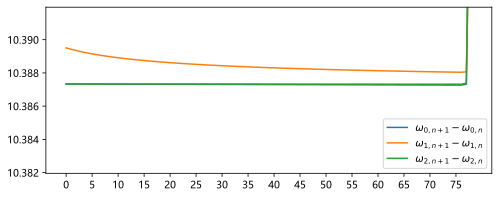

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,3))
n_osc_lvls = max_ol-1
dressed_osc_frequencies = [[] for _ in range(3)]
for j in [0,1,2]:
    for i in range(0,max_ol-1):
        dressed_osc_frequencies[j].append(dressed_ener(j,i+1)-dressed_ener(j,i))
        
for j in [0,1,2]:
    plt.plot(list(range(max_ol-1))[:n_osc_lvls], dressed_osc_frequencies[j][:n_osc_lvls],label=rf'$\omega_{{{j},n+1}} - \omega_{{{j},n}}$')

plt.xticks(list(range(n_osc_lvls))[::5])
plt.ylim(Er-0.005, Er+0.005)
# plt.ylim(7.9,7.92)

# plt.xticklabels([str(i) for i in range(n_osc_lvls)])
plt.legend(loc='lower right')

In [5]:

evals, evecs = system.hilbertspace.hamiltonian().eigenstates()
overlap_matrix = scqubits.utils.spectrum_utils.convert_evecs_to_ndarray(evecs)
def print_top_two_dressed_state(product_index):
    overlaps_with_product_state = np.abs(overlap_matrix[:, product_index])
    sorted_indices = np.argsort(overlaps_with_product_state)[::-1]
    sorted_overlaps = overlaps_with_product_state[sorted_indices]
    print(list(sorted_indices)[:2])
    print(list(sorted_overlaps)[:2])

print(f"\t\tqubit 0\t\t\tqubit 1 \t\t qubit 2")

print(f"osc lvl\t\tdressed-overlap^2\tdressed-overlap^2\tdressed-overlap^2")
for i in range(max_ol-1):
    product_index_q0 = 0 * system.osc.truncated_dim + i
    product_index_q1 = 1 * system.osc.truncated_dim + i
    product_index_q2 = 2 * system.osc.truncated_dim + i

    overlaps_with_product_state_q0 = np.abs(overlap_matrix[:, product_index_q0])
    sorted_indices_q0 = np.argsort(overlaps_with_product_state_q0)[::-1]
    sorted_overlaps_q0 = overlaps_with_product_state_q0[sorted_indices_q0]

    overlaps_with_product_state_q1 = np.abs(overlap_matrix[:, product_index_q1])
    sorted_indices_q1 = np.argsort(overlaps_with_product_state_q1)[::-1]
    sorted_overlaps_q1 = overlaps_with_product_state_q1[sorted_indices_q1]
    
    overlaps_with_product_state_q2 = np.abs(overlap_matrix[:, product_index_q2])
    sorted_indices_q2 = np.argsort(overlaps_with_product_state_q2)[::-1]
    sorted_overlaps_q2 = overlaps_with_product_state_q2[sorted_indices_q2]

    print(f"ol-{i}:\t\t{list(sorted_indices_q0)[0]}-{list(sorted_overlaps_q0)[0]**2:.3f} \t\t{list(sorted_indices_q1)[0]}-{list(sorted_overlaps_q1)[0]**2:.3f} \t\t{list(sorted_indices_q2)[0]}-{list(sorted_overlaps_q2)[0]**2:.3f}")

		qubit 0			qubit 1 		 qubit 2
osc lvl		dressed-overlap^2	dressed-overlap^2	dressed-overlap^2
ol-0:		0-1.000 		1-1.000 		2-1.000
ol-1:		9-0.999 		12-0.983 		13-1.000
ol-2:		28-0.999 		33-0.969 		34-0.999
ol-3:		58-0.998 		63-0.955 		64-0.999
ol-4:		88-0.998 		93-0.943 		94-0.999
ol-5:		118-0.997 		123-0.932 		124-0.998
ol-6:		148-0.997 		153-0.923 		154-0.998
ol-7:		178-0.996 		183-0.913 		184-0.998
ol-8:		208-0.996 		213-0.905 		214-0.998
ol-9:		238-0.995 		243-0.897 		244-0.997
ol-10:		268-0.995 		273-0.890 		274-0.997
ol-11:		298-0.994 		303-0.884 		304-0.997
ol-12:		328-0.994 		333-0.877 		334-0.996
ol-13:		358-0.993 		363-0.872 		364-0.996
ol-14:		388-0.993 		393-0.866 		394-0.996
ol-15:		418-0.992 		423-0.861 		424-0.996
ol-16:		448-0.991 		453-0.856 		454-0.995
ol-17:		478-0.991 		483-0.852 		484-0.995
ol-18:		508-0.990 		513-0.847 		514-0.995
ol-19:		538-0.990 		543-0.843 		544-0.994
ol-20:		568-0.989 		573-0.839 		574-0.994
ol-21:		598-0.989 		603-0.836 		604-0.994
ol-22:		628